# Finding MAPE score for the first window of all four datasets for DeepState

## imports

In [1]:
# Third-party imports
%matplotlib inline
import json
import matplotlib.pyplot as plt
import yaml
from IPython.display import display


In [2]:
from src.RQ1_forecast import *

In [3]:
def add_mean(forcast_list_val):
    for forcast_list_el in forcast_list_val:
        forcast_list_el['mean'] = forcast_list_el.loc[:, 'sample0':f'sample{num_samples-1}'].mean(axis=1)

        
def mape_score(target, forecast):
    denominator = np.abs(target)
    flag = denominator == 0
    mape = np.mean(np.abs((target - forecast) * (1 - flag)) / (denominator + flag) )
    return mape

def calc_mape_horizon(forcast_list_val, horizon_lim, rep_no_val):
    mape_horizon_arr = np.zeros(horizon_lim)
    for horizon_no in range(horizon_lim):
        label_val = [i for i in range(horizon_no, forcast_list_val[rep_no_val].shape[0], horizon_lim)]
        target = forcast_list_val[rep_no_val].iloc[label_val]['target']
        mean = forcast_list_val[rep_no_val].iloc[label_val]['mean']
        mape_horizon_arr[horizon_no] = mape_score(target.to_numpy(), mean.to_numpy())
    return mape_horizon_arr

def mape_all(forcast_list_val, horizon_lim):
    mape_experiment_horizon = np.zeros((len(forcast_list_val), horizon_lim))
    for rep_no_val in range(len(forcast_list_val)):
        mape_experiment_horizon[rep_no_val] = calc_mape_horizon(
            forcast_list_val=forcast_list_val,
            horizon_lim=horizon_lim,
            rep_no_val=rep_no_val)
    return mape_experiment_horizon

In [4]:
model_name = 'state'
with open(f'/home/dev/deepts/configs/ks_config_{model_name}.yaml', "r") as f:
            config = yaml.load(f, Loader=yaml.FullLoader)


# Electricity

In [5]:
model_name = config['model_name']
dataset_name = "electricity" 
if config[dataset_name] is not None:
    forcast_list1 = read_csv_result('forecasts.csv', config[dataset_name])



101it [00:00, 177.98it/s]
100%|###########| 100/100 [06:25<00:00,  3.85s/it]


In [6]:
add_mean(forcast_list1)
mape_experiment_elec = mape_all(forcast_list1, horizon_lim=24)

In [7]:
mape_experiment_elec[0]

array([0.66665666, 0.44222108, 0.42472204, 0.51187163, 1.13181889,
       1.22710656, 1.27572911, 1.3068843 , 1.34589353, 1.31300307,
       1.25335417, 1.09218355, 0.96787242, 0.84660926, 0.78635786,
       0.75840868, 0.72864352, 0.76160707, 0.79768449, 0.76664465,
       0.75565535, 0.72025779, 0.70777719, 0.69082654])

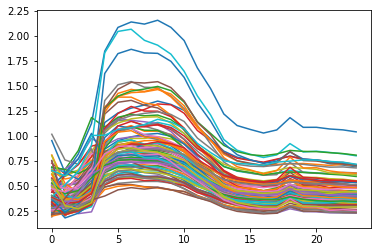

In [8]:
plt.plot(mape_experiment_elec.T)
plt.show()

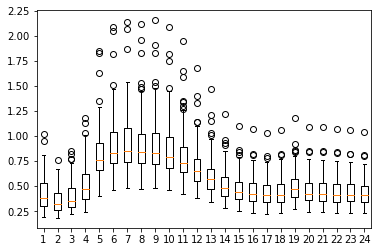

In [9]:
plt.boxplot(mape_experiment_elec)
plt.show()

# Solar_nips

In [10]:
dataset_name = 'solar_nips'
if config[dataset_name] is not None:
    forcast_list_solar = read_csv_result('forecasts.csv', config[dataset_name])



101it [00:00, 287.57it/s]
100%|###########| 100/100 [03:01<00:00,  1.82s/it]


In [11]:
add_mean(forcast_list_solar)
mape_experiment_solar = mape_all(forcast_list_solar, horizon_lim=24)

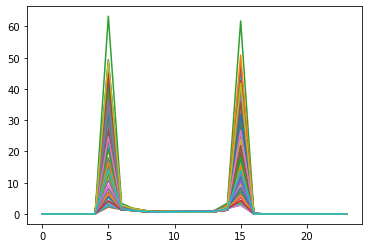

In [12]:
plt.plot(mape_experiment_solar.T)
plt.show()

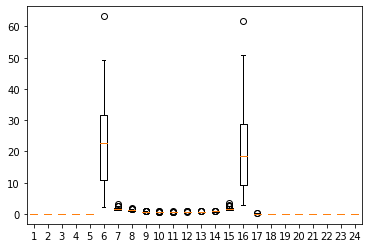

In [13]:
plt.boxplot(mape_experiment_solar)
plt.show()

# Exchange rate

In [14]:
dataset_name = "exchange_rate"
if config[dataset_name] is not None:
    forcast_list_exc = read_csv_result('forecasts.csv', config[dataset_name])

101it [00:00, 325.67it/s]
100%|###########| 100/100 [00:12<00:00,  7.89it/s]


In [15]:
add_mean(forcast_list_exc)
mape_experiment_exc = mape_all(forcast_list_exc, horizon_lim=30)


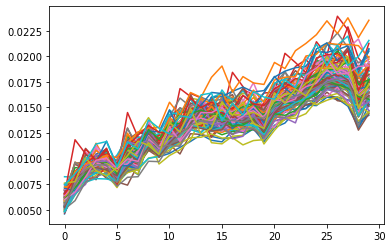

In [16]:
plt.plot(mape_experiment_exc.T)
plt.show()

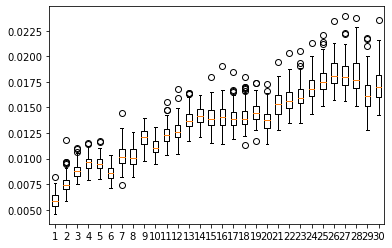

In [17]:
plt.boxplot(mape_experiment_exc)
plt.show()

# Traffic_nips

In [18]:
dataset_name = 'traffic_nips'
if config[dataset_name] is not None:
    forcast_list_traf = read_csv_result('forecasts.csv', config[dataset_name])

101it [00:00, 35331.50it/s]
100%|###########| 100/100 [20:59<00:00, 12.60s/it]


In [19]:
add_mean(forcast_list_traf)
mape_experiment_traf = mape_all(forcast_list_traf, horizon_lim=24)

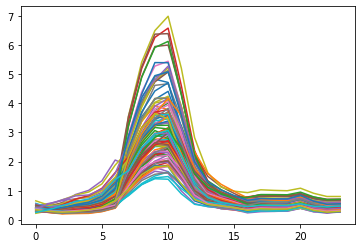

In [20]:
plt.plot(mape_experiment_traf.T)
plt.show()

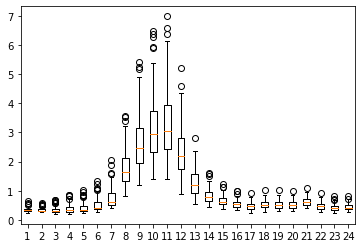

In [21]:
plt.boxplot(mape_experiment_traf)
plt.show()